# Code your own Neuron and NN

In [1]:
# Define 2 vectors (lists): input my_x, my_w
my_x = [0, 1, 1]
my_w = [-10, 10, 5]



In [2]:
def mul(a, b):
    """
    Return a list c, with the same length as a, b
    """
    c = []
    for a_i, b_i in zip(a, b):
        c.append(a_i*b_i)
    return c


In [3]:
mul(my_x, my_w)

[0, 10, 5]

In [4]:
# Define a scalar: bias b
my_b = -5


In [5]:
# Neuron linear (internal) potential
def linear(x, w, b):
    """
    Return the linear function of x, w, b
    """
    return sum(mul(x, w)) + b


In [6]:
linear(my_x, my_w, my_b)


10

In [7]:
from numpy import exp


In [8]:
# Logistic Sigmoid function
def sigmoid(x):
    """
    Return the sigmoid function of x
    """
    return 1/(1+exp(-x))


In [9]:
# Try out sigmoid function for different z values:
for z in (-5, 0, 5):
    print(f"sigmoid({z=}) = {sigmoid(z):.2f}")


sigmoid(z=-5) = 0.01
sigmoid(z=0) = 0.50
sigmoid(z=5) = 0.99


In [10]:
# import some plotting stuff to graph sigmoid
from numpy import linspace
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')


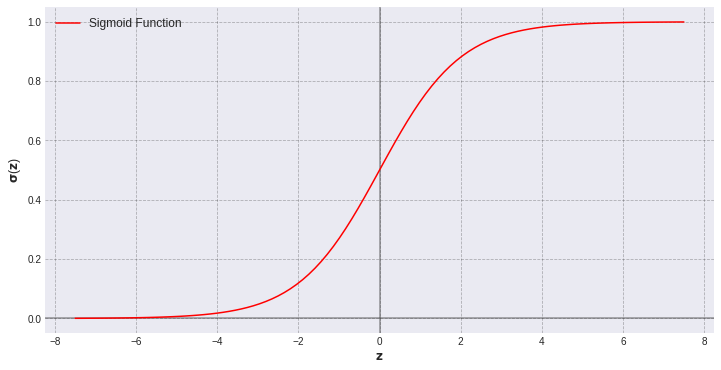

In [11]:
# Get a pair of axis and grid lines centered at (0,0)
fig, ax = plt.subplots(figsize=(12, 6))
ax.axhline(c=".2", alpha=.5)
ax.axvline(color=".2", alpha=.5)
ax.grid(c='.1', ls="--", alpha=.3)

# Plot across a span of numbers
z = linspace(-7.5, 7.5, 100)
ax.plot(z, sigmoid(z), c="red", label="Sigmoid Function")
ax.set_xlabel(r"$\mathbf{z}$", fontsize=12)
ax.set_ylabel(r"$\mathbf{\sigma}$($\mathbf{z}$)", fontsize=12)
ax.legend(fontsize=12)


In [12]:
# full neuron function
def neuron(x, w, b):
    """
    Return the neuron function of x, w, b
    """
    return sigmoid(linear(x, w, b))


In [13]:
print(f"neuron({my_x=}, {my_w=}, {my_b=}) = {neuron(my_x, my_w, my_b):.5f}")


neuron(my_x=[0, 1, 1], my_w=[-10, 10, 5], my_b=-5) = 0.99995


In [14]:
# Package OR neuron weights and bias
def or_neuron(x):
    """
    Return x1 OR x2 (x1 + x2)
    """
    return neuron(x, [1, 1], -1)


In [15]:
# Defina a collection of inputs to test OR and AND
my_x_collection = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]


In [16]:
print('Checking OR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{or_neuron(my_x):.3f}')


Checking OR neuron output
[0, 0] 0.269
[0, 1] 0.500
[1, 0] 0.500
[1, 1] 0.731


In [17]:
# Package AND neuron weights and bias
def and_neuron(x):
    """
    Return x1 AND x2 (x1 * x2)
    """
    return neuron(x, [1, 1], -2)


In [18]:
print('Checking AND neuron output')
for my_x in my_x_collection:
    print(my_x, f'{and_neuron(my_x):.3f}')


Checking AND neuron output
[0, 0] 0.119
[0, 1] 0.269
[1, 0] 0.269
[1, 1] 0.500


In [19]:
def not_neuron(x):
    """
    Return Not x1
        """
    return 1 - neuron(x, [1], 0)


In [20]:
print('Checking NOT neuron output')
for my_x in my_x_collection:
    print(my_x, f'{not_neuron(my_x):.3f}')


Checking NOT neuron output
[0, 0] 0.500
[0, 1] 0.500
[1, 0] 0.269
[1, 1] 0.269


In [21]:
# Combine OR, AND, and NOT into XOR Neuron
def xor_neuron(x):
    """
    Return x1_ * x2 + x1 * x2_
    """
    return or_neuron(x) * and_neuron(x) + not_neuron(x) * or_neuron(x)


In [22]:
print('Checking XOR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{xor_neuron(my_x):.3f}')


Checking XOR neuron output
[0, 0] 0.167
[0, 1] 0.384
[1, 0] 0.269
[1, 1] 0.562


In [23]:
def half_adder(x):
    """
    Combine an XOR and an AND neuron into a half-adder
    """
    return xor_neuron(x), and_neuron(x)


print('Checking half-adder neuron output')
for my_x in my_x_collection:
    print(my_x, f'{half_adder(my_x)[0]:.3f}', f'{half_adder(my_x)[1]:.3f}')


Checking half-adder neuron output
[0, 0] 0.167 0.119
[0, 1] 0.384 0.269
[1, 0] 0.269 0.269
[1, 1] 0.562 0.500


In [24]:
def full_adder(x):
    """
    Combine two half-adders into a full-adder
    """
    return half_adder(x)[0] + half_adder(x)[1], half_adder(x)[0] * half_adder(x)[1]


In [25]:
for my_x in my_x_collection:
    print(my_x, f'{full_adder(my_x)[0]:.3f}', f'{full_adder(my_x)[1]:.3f}')


[0, 0] 0.286 0.020
[0, 1] 0.653 0.103
[1, 0] 0.538 0.072
[1, 1] 1.062 0.281
